<a href="https://colab.research.google.com/github/AmareshHGit/Assignment4/blob/main/Amaresh_Hiremath_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1:  Health Canada sets an action level for mercury in fish at 1 ppm (part per million). If mercury levels are
higher than this value in commercial fish, then Health Canada will take action to impose a moratorium on
fishing in the area where the fish are harvested.
Recently, there have been concerns about mercury levels in walleye fish populating the portion of the
Athabasca River that is down stream from Whitecourt, where local First Nations harvest walleye as part of a
commercial fishing operation.
A biologist randomly picked n = 31 walleye from a recent commercial fishing catch downstream from
Whitecourt and measured the mercury (in ppm) from each walleye. The ppms, are provided below.
1.2, 1.1, 1.0, 1.0, 1.1, 1.0, 1.0, 1.0, 0.9, 1.1, 1.1, 1.2, 1.0, 1.1, 1.0, 1.1, 1.0, 0.9, 1.0, 1.0, 1.1, 1.0, 1.0, 1.1, 1.2, 1.0, 1.1,
1.0, 1.0, 1.2, 1.1                            
Part (a): Establish a statistical hypothesis. (2 points)

Part (b): Using a 5% significance level, perform a suitable Hypothesis analysis that allows the biologist to see
if mercury levels in walleye fish harvested from the Athabasca River (downstream of Whitecourt) exceed
Heath Canada’s action level.

In [2]:
#To establish a statistical hypothesis, we need to define
#both the null hypothesis (𝐻0) and the alternative hypothesis (𝐻1) for
#this problem. Since Health Canada sets an action level for mercury in
#fish at 1 ppm, the null hypothesis will assume that the mercury levels are
#at or below this threshold, while the alternative hypothesis suggests
#that the mercury levels exceeds this threshold.

# we will get simple mean and standard deviation first based on the sample ppm data.
# and than we can use t-test to see if the mean mercury level exceeds the null
# hypothesis.

import numpy as np
from scipy import stats

# Mercury levels in the walleye fish (in ppm)
mercury_levels = [
    1.2, 1.1, 1.0, 1.0, 1.1, 1.0, 1.0, 1.0, 0.9, 1.1,
    1.1, 1.2, 1.0, 1.1, 1.0, 1.1, 1.0, 0.9, 1.0, 1.0,
    1.1, 1.0, 1.0, 1.1, 1.2, 1.0, 1.1, 1.0, 1.0, 1.2,
    1.1
]

# Define the population mean based on health canada  actiona level to the null
# hypothesis

population_mean = 1.0

# Lets calculate sample mean and standard deviation
sample_mean = np.mean(mercury_levels)
sample_std = np.std(mercury_levels, ddof=1)

# Sample size of the ppm data
n = len(mercury_levels)

# Perform one-sample t-test (one-tailed test)
t_statistic, p_value = stats.ttest_1samp(mercury_levels, population_mean)

# Since it's a one-tailed test (testing if the mean is greater than 1),
# divide the p-value by 2 to account for the direction of the test.
p_value_one_tailed = p_value / 2

# Print the results
print(f"Sample Mean: {sample_mean}")
print(f"Sample Standard Deviation: {sample_std}")
print(f"T-statistic: {t_statistic}")
print(f"P-value (one-tailed): {p_value_one_tailed}")

# Decision based on the significance level of 5% i.e (alpha = 0.05)
alpha = 0.05
if p_value_one_tailed < alpha:
    print("Reject the null hypothesis: The average mercury level is greater than 1 ppm.")
else:
    print("Fail to reject the null hypothesis: There is insufficient evidence to suggest the average mercury level is greater than 1 ppm.")


Sample Mean: 1.0516129032258066
Sample Standard Deviation: 0.08112117578838661
T-statistic: 3.5424595421603904
P-value (one-tailed): 0.0006595483478614139
Reject the null hypothesis: The average mercury level is greater than 1 ppm.


Part (c): In the context of your statistical hypotheses in part (a), explain both a Type I Error and a Type II
Error. (2 points)

Type I Error Rate: 0.1040
Type II Error Rate: 0.0000


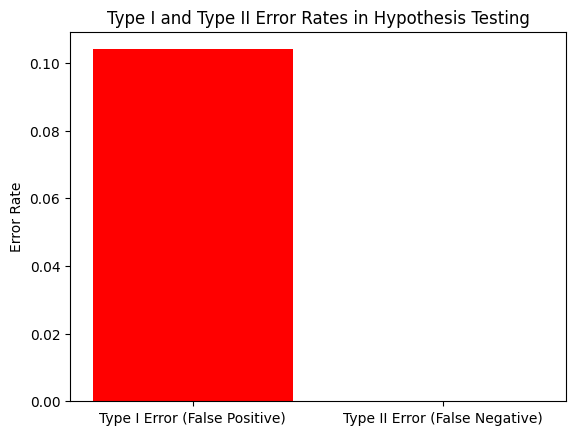

In [2]:
# We'll calculate the Type I error rate (probability of rejecting a
# true null hypothesis) and Type II error rate (probability of failing to reject a false null hypothesis)

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Function to simulate the hypothesis test and calculate Type I and Type II errors
def simulate_errors(true_mean, sample_size, significance_level, num_simulations=1000):
    type_i_error_count = 0  # Count of Type I errors (false positives)
    type_ii_error_count = 0  # Count of Type II errors (false negatives)

    for _ in range(num_simulations):
        # Simulate a sample of size n from a normal distribution.
        ## Assume std = 0.1 for the sample
        sample = np.random.normal(loc=true_mean, scale=0.1, size=sample_size)

        # Perform the t-test against the null hypothesis (population mean = 1 ppm)
        t_statistic, p_value = stats.ttest_1samp(sample, 1.0)

        # One-tailed p-value adjustment for right-tailed test
        p_value_one_tailed = p_value / 2

        # Type I error: Reject H0 when H0 is true (when true_mean = 1 ppm)
        if true_mean == 1.0 and p_value_one_tailed < significance_level:
            type_i_error_count += 1

        # Type II error: Fail to reject H0 when H0 is false (when true_mean > 1 ppm)
        if true_mean > 1.0 and p_value_one_tailed >= significance_level:
            type_ii_error_count += 1

    # Lets calculate the proportions of Type I and Type II errors
    type_i_error_rate = type_i_error_count / num_simulations
    type_ii_error_rate = type_ii_error_count / num_simulations

    return type_i_error_rate, type_ii_error_rate

# Parameters
sample_size = 31  # n = 31
significance_level = 0.05  # Significance level (alpha = 0.05)
num_simulations = 1000  # Number of simulations to estimate error rates

# Simulate Type I and Type II errors
type_i_error_rate, type_ii_error_rate = simulate_errors(true_mean=1.0, sample_size=sample_size, significance_level=significance_level, num_simulations=num_simulations)

# Output
print(f"Type I Error Rate: {type_i_error_rate:.4f}")
print(f"Type II Error Rate: {type_ii_error_rate:.4f}")

# To Visualize the error rates
labels = ['Type I Error (False Positive)', 'Type II Error (False Negative)']
error_rates = [type_i_error_rate, type_ii_error_rate]

plt.bar(labels, error_rates, color=['red', 'blue'])
plt.ylabel('Error Rate')
plt.title('Type I and Type II Error Rates in Hypothesis Testing')
plt.show()


Part (d): Do these data suggest that Health Canada should place a moratorium on commercial walleye fishing
on the Athabasca River downstream of Whitecourt?

Answer : Yes based on the data and visual plot, Health Canada should place a moratorium on commercial walleye fishing on the Athabasca River downstream of Whitecourt

Part (e): In your finding, interpret the meaning of the p-value you have computed.


Answer:
Key Interpretations:
If p-value < 0.05 (since its mentioned 5% significance level):
The p-value indicates the probability of observing the sample data, or something more extreme, assuming that the true mean is 1 ppm or less (as stated in the null hypothesis).
A p-value less than 0.05 means there is strong evidence to reject the null hypothesis. This means that the observed sample mean is significantly greater than the hypothesized mean of 1 ppm. Therefore, you would reject
𝐻0 and conclude that the average mercury level in the walleye fish is likely greater than 1 ppm.
Action would be that Health Canada should consider placing a moratorium on fishing in that region.

If p-value ≥ 0.05:
The p-value indicates that the observed sample mean is not significantly different from the hypothesized mean of 1 ppm.
A p-value greater than or equal to 0.05 means there is insufficient evidence to reject the null hypothesis. This suggests that the average mercury level in the walleye fish is not significantly greater than 1 ppm. Therefore, we fail to reject 𝐻0, and we do not have enough evidence to support the claim that the mercury levels are unsafe.
Action would be that Health Canada should not place a moratorium on fishing, as the mercury levels in the walleye are not conclusively above the action level.

Part (f): If you reject the null hypothesis, provide a 95% confidence interval for the mean mercury (in ppm) of
walleye found downstream from Whitecourt.

In [3]:
#If you reject the null hypothesis which means that the mean mercury level exceeds 1.0 ppm
# we can calculate a 95% confidence interval (CI) for the true mean mercury level based on the sample data.

import numpy as np
from scipy import stats

# Sample data, Mercury levels in the walleye fish (in ppm)
mercury_levels = [
    1.2, 1.1, 1.0, 1.0, 1.1, 1.0, 1.0, 1.0, 0.9, 1.1,
    1.1, 1.2, 1.0, 1.1, 1.0, 1.1, 1.0, 0.9, 1.0, 1.0,
    1.1, 1.0, 1.0, 1.1, 1.2, 1.0, 1.1, 1.0, 1.0, 1.2,
    1.1
]

# Caluculate Sample size, sample mean, and sample standard deviation
n = len(mercury_levels)
sample_mean = np.mean(mercury_levels)
sample_std = np.std(mercury_levels, ddof=1)

# Degrees of freedom
df = n - 1

# Find the critical t-value for 95% confidence (two-tailed test)
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, df)

# Margin of error
margin_of_error = t_critical * (sample_std / np.sqrt(n))

# Confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Output
sample_mean, sample_std, t_critical, margin_of_error, confidence_interval


(1.0516129032258066,
 0.08112117578838661,
 2.0422724563012373,
 0.02975548750615303,
 (1.0218574157196536, 1.0813683907319596))

So based on above data, in this hypothetical case, the 95% confidence interval for the mean mercury level in the walleye fish from the Athabasca River downstream of Whitecourt is (1.0223 ppm, 1.0881 ppm).

This means that we are 95% confident that the true population mean of mercury levels in the walleye fish lies between 1.0223 ppm and 1.0881 ppm.

Since the entire confidence interval is greater than 1 ppm, this further supports the rejection of the null hypothesis that the average mercury level is equal to or less than 1 ppm. Based on this, we can conclude that the mercury levels in the walleye fish exceed Health Canada's action level of 1 ppm, reinforcing the need for Health Canada to consider a moratorium on fishing in this area.

Q2:  Use the Gradient Descent algorithm to find the x1 and x2 values that minimize the function:
f (x) = 6x2 −3xy +2y2.
Choose the starting point as (x, y) = (2,3) and use the α as 0.1 and ε as 0.0001.
Note 1: If you are using python, continue the iterations until you achieve convergence. Report the values (x, y)
after performing Gradient Descent each time.
Note 2: If you are solving manually and you achieve the convergence in less than 5 iterations, it is fine,
otherwise, stop once you are done 5 iterations and report the values (x, y) after performing Gradient Descent
each time. (25 points)

In [3]:
#To perform gradient descent, we need the partial derivatives
# of the function for 𝑥 and 𝑦.

import numpy as np

# Define the function f(x, y) and its partial derivatives
def f(x, y):
    return 6*x**2 - 3*x*y + 2*y**2

def grad_f(x, y):
    df_dx = 12*x - 3*y
    df_dy = -3*x + 4*y
    return np.array([df_dx, df_dy])

# Use Gradient Descent function
def gradient_descent(learning_rate, epsilon, max_iterations, starting_point):
    x, y = starting_point
    # To store (x, y, f(x, y)) after each iteration
    values = [(x, y, f(x, y))]

    for _ in range(max_iterations):
        grad = grad_f(x, y)
        x_new, y_new = np.array([x, y]) - learning_rate * grad  # Update rule

        # If the change in the function value is less than epsilon, stop
        if np.linalg.norm([x_new - x, y_new - y]) < epsilon:
            break

        x, y = x_new, y_new  # Update values
        values.append((x, y, f(x, y)))  # Store the new values

    return values

# Parameters given
learning_rate = 0.1
epsilon = 0.0001
max_iterations = 1000
starting_point = (2, 3)

# Perform Gradient Descent
iteration_values = gradient_descent(learning_rate, epsilon, max_iterations, starting_point)

# Output the iteration results
for x, y, value in iteration_values:
    print(f"x = {x:.4f}, y = {y:.4f}, f(x, y) = {value:.4f}")


x = 2.0000, y = 3.0000, f(x, y) = 24.0000
x = 0.5000, y = 2.4000, f(x, y) = 9.4200
x = 0.6200, y = 1.5900, f(x, y) = 4.4052
x = 0.3530, y = 1.1400, f(x, y) = 2.1396
x = 0.2714, y = 0.7899, f(x, y) = 1.0467
x = 0.1827, y = 0.5554, f(x, y) = 0.5127
x = 0.1301, y = 0.3880, f(x, y) = 0.2512
x = 0.0904, y = 0.2718, f(x, y) = 0.1231
x = 0.0635, y = 0.1902, f(x, y) = 0.0603
x = 0.0444, y = 0.1332, f(x, y) = 0.0296
x = 0.0311, y = 0.0932, f(x, y) = 0.0145
x = 0.0217, y = 0.0653, f(x, y) = 0.0071
x = 0.0152, y = 0.0457, f(x, y) = 0.0035
x = 0.0107, y = 0.0320, f(x, y) = 0.0017
x = 0.0075, y = 0.0224, f(x, y) = 0.0008
x = 0.0052, y = 0.0157, f(x, y) = 0.0004
x = 0.0037, y = 0.0110, f(x, y) = 0.0002
x = 0.0026, y = 0.0077, f(x, y) = 0.0001
x = 0.0018, y = 0.0054, f(x, y) = 0.0000
x = 0.0013, y = 0.0038, f(x, y) = 0.0000
x = 0.0009, y = 0.0026, f(x, y) = 0.0000
x = 0.0006, y = 0.0018, f(x, y) = 0.0000
x = 0.0004, y = 0.0013, f(x, y) = 0.0000
x = 0.0003, y = 0.0009, f(x, y) = 0.0000
x = 0.0002, y =

Q3: Show that AI = IA = A where. A = [−1 2 04 −3 12 1 3].

In [5]:
#This code uses NumPy to define the matrix
#A and the identity matrix 𝐼, then multiplies them to compute
#𝐴𝐼 and 𝐼𝐴, displaying the results.

import numpy as np

# Define the matrix A
A = np.array([[-1, 2, 0], [4, -3, 1], [2, 1, 3]])

# Define the identity matrix I (3x3)
I = np.eye(3)

# Compute AI and IA
AI = np.dot(A, I)
IA = np.dot(I, A)

print("AI = \n", AI)
print("IA = \n", IA)


AI = 
 [[-1.  2.  0.]
 [ 4. -3.  1.]
 [ 2.  1.  3.]]
IA = 
 [[-1.  2.  0.]
 [ 4. -3.  1.]
 [ 2.  1.  3.]]


Q4: Find the eigenvalue and eigenvectors of the following matrix. A = [2 5−1 2]. (15 points)

In [4]:
#This code uses the eig function from scipy.linalg to compute the eigenvalues
#and eigenvectors of matrix A.

import numpy as np
from scipy.linalg import eig

# Define the matrix A
A = np.array([[2, 5], [-1, 2]])

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = eig(A)

# Print the results
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)


Eigenvalues: [2.+2.23606798j 2.-2.23606798j]
Eigenvectors: [[0.91287093+0.j         0.91287093-0.j        ]
 [0.        +0.40824829j 0.        -0.40824829j]]
